In [2]:
print('C5_TASK3 PYTHON CreditOne Default Report')

C5_TASK3 PYTHON CreditOne Default Report


In [1]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# cross_validation changed to model_selection for this version of scikit-learn I guess
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


In [2]:
#data import
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Redo pre-processing
print('redo pre-processing')

redo pre-processing


In [4]:
rawData["DEFAULT"]= rawData["default payment next month"]

In [5]:
rawData = rawData.drop("default payment next month",axis=1)

In [17]:
#create dataframe as well
#df = pd.DataFrame(rawData)

In [80]:
#age_bins = pd.cut(df.AGE, 7)
#df['age_bins'] = age_bins
#limit_bins = pd.cut(df.LIMIT_BAL, 10)
#df['limit_bins'] = limit_bins
#bill1_bins = pd.cut(df.BILL_AMT1, 14)
#df['bill1_bins'] = bill1_bins

#df2 = df[['ID', 'LIMIT_BAL', 'limit_bins', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'age_bins','PAY_0',
#       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1','bill1_bins', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','DEFAULT']]

In [6]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#features
features = rawData.iloc[:,0:25]
print('Summary of feature sample')
features.head()

Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#dependent variable
depVar = rawData['DEFAULT']

In [9]:
print('COVARIANCE ESTIMATION')

COVARIANCE ESTIMATION


In [10]:
print('EDA')

EDA


In [11]:
print('FEATURE ENGINEERING')

FEATURE ENGINEERING


In [12]:
#Take subset of data to reduce time of processing
subData = rawData.iloc[0:100,:]
subData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
#Change feature types when necessary
rawData2 = rawData
rawData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [219]:
#rawData2["SEX"]= rawData2["SEX"].astype('category')
#rawData2["ID"]= rawData2["ID"].astype('category')
#rawData2["EDUCATION"]= rawData2["EDUCATION"].astype('category')
#rawData2["MARRIAGE"]= rawData2["MARRIAGE"].astype('category')
#rawData2["PAY_0"]= rawData2["PAY_0"].astype('category')
#rawData2["PAY_2"]= rawData2["PAY_2"].astype('category')
#rawData2["PAY_3"]= rawData2["PAY_3"].astype('category')
#rawData2["PAY_4"]= rawData2["PAY_4"].astype('category')
#rawData2["PAY_5"]= rawData2["PAY_5"].astype('category')
#rawData2["PAY_6"]= rawData2["PAY_6"].astype('category')
#rawData2["DEFAULT"]= rawData2["DEFAULT"].astype('category')
#rawData2.info()

In [ ]:
#from sklearn.feature_selection import RFECV
#from sklearn.svm import SVR
#X = subData[:,0:24]
#estimator = SVR(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X, y)

In [14]:
#Split out dependent variable: full dataset
features2 = rawData2.iloc[:,0:23]
target2 = rawData2['DEFAULT']
features2.head()
target2.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [15]:
X = rawData2.iloc[:,0:24]
X.head()
Y = rawData2['DEFAULT']
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [38]:
#%%time 
#from sklearn.feature_selection import RFECV
#from sklearn.svm import SVR
#estimator = SVR(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X, Y)

In [76]:
%%time 
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 12)
rfe = rfe.fit(features2, target2)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\

[False  True  True  True  True  True  True  True  True  True  True False
 False  True False False False False False False False  True False]
[ 8  1  1  1  1  1  1  1  1  1  1  5  9  1 12 11  2  4  6  7 10  1  3]
Wall time: 1min 6s


c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [78]:
#Discretize LIMIT_BAL

In [16]:
#age_bins = pd.cut(df.AGE, 7)
#df['age_bins'] = age_bins
limit_bins = pd.cut(rawData2.LIMIT_BAL, 10)
rawData2['limit_bins'] = limit_bins
limit_bins.head()
#bill6_bins = pd.cut(df.BILL_AMT6, 14)
#df['bill6_bins'] = bill6_bins

rawDataLB = rawData2[['LIMIT_BAL', 'limit_bins', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','DEFAULT']]
rawDataLB.head()

,LIMIT_BAL,limit_bins,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,"(9010.0, 109000.0]",2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,120000,"(109000.0, 208000.0]",2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,"(9010.0, 109000.0]",2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,"(9010.0, 109000.0]",2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,"(9010.0, 109000.0]",1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
#from sklearn.preprocessing import LabelEncoder
#le_LIMIT_BAL = LabelEncoder()
#rawDataLB['LIMIT_BAL_encoded'] = le_LIMIT_BAL.fit_transform(rawDataLB.limit_bins)
#pd.get_dummies(rawDataLB.limit_bins,prefix=['limit_bins'])
#rawDataLB.head()

# use pd.concat to join the new columns with your original dataframe
rawDataLB = pd.concat([rawDataLB,pd.get_dummies(rawDataLB['limit_bins'], prefix='limit_bins')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
rawDataLB.drop(['limit_bins'],axis=1, inplace=True)

In [18]:
rawDataLB.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"limit_bins_(9010.0, 109000.0]","limit_bins_(109000.0, 208000.0]","limit_bins_(208000.0, 307000.0]","limit_bins_(307000.0, 406000.0]","limit_bins_(406000.0, 505000.0]","limit_bins_(505000.0, 604000.0]","limit_bins_(604000.0, 703000.0]","limit_bins_(703000.0, 802000.0]","limit_bins_(802000.0, 901000.0]","limit_bins_(901000.0, 1000000.0]"
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,0,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
rawDataLB2 = rawDataLB[['LIMIT_BAL', 'limit_bins_(9010.0, 109000.0]', 'limit_bins_(109000.0, 208000.0]','limit_bins_(208000.0, 307000.0]', 'limit_bins_(307000.0, 406000.0]', 'limit_bins_(406000.0, 505000.0]', 'limit_bins_(505000.0, 604000.0]', 'limit_bins_(604000.0, 703000.0]', 'limit_bins_(703000.0, 802000.0]', 'limit_bins_(802000.0, 901000.0]', 'limit_bins_(901000.0, 1000000.0]', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','DEFAULT']]
rawDataLB2.head()

,LIMIT_BAL,"limit_bins_(9010.0, 109000.0]","limit_bins_(109000.0, 208000.0]","limit_bins_(208000.0, 307000.0]","limit_bins_(307000.0, 406000.0]","limit_bins_(406000.0, 505000.0]","limit_bins_(505000.0, 604000.0]","limit_bins_(604000.0, 703000.0]","limit_bins_(703000.0, 802000.0]","limit_bins_(802000.0, 901000.0]",...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,1,0,0,0,0,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,1,0,0,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,1,0,0,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,0,0,0,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
#Split out dependent variable: full dataset
featuresLB2 = rawDataLB2.iloc[:,0:33]
targetLB2 = rawDataLB2['DEFAULT']
featuresLB2.head()
#targetLB2.head()

,LIMIT_BAL,"limit_bins_(9010.0, 109000.0]","limit_bins_(109000.0, 208000.0]","limit_bins_(208000.0, 307000.0]","limit_bins_(307000.0, 406000.0]","limit_bins_(406000.0, 505000.0]","limit_bins_(505000.0, 604000.0]","limit_bins_(604000.0, 703000.0]","limit_bins_(703000.0, 802000.0]","limit_bins_(802000.0, 901000.0]",...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,1,0,0,0,0,0,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,1,0,0,0,0,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,1,0,0,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,1,0,0,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,0,0,0,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [160]:
%%time 
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 12)
rfe = rfe.fit(featuresLB2, targetLB2)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ryan\appdata\local\programs\python\python37-32\lib\

[False  True  True  True False False False False False False False  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False]
[11  1  1  1 13 17 18 20 19 22 21  1  1  1  1  1  1  1  1  1  2 14  9 16
 12  7  5  4  8  3 10 15  6]
Wall time: 2min 37s


c:\users\ryan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [221]:
#rawDataLB2["limit_bins_(9010.0, 109000.0]"]= rawDataLB2["limit_bins_(9010.0, 109000.0]"].astype('category')
#rawDataLB2["limit_bins_(109000.0, 208000.0]"]= rawDataLB2["limit_bins_(109000.0, 208000.0]"].astype('category')
#rawDataLB2["limit_bins_(208000.0, 307000.0]"]= rawDataLB2["limit_bins_(208000.0, 307000.0]"].astype('category')
#rawDataLB2["limit_bins_(307000.0, 406000.0]"]= rawDataLB2["limit_bins_(307000.0, 406000.0]"].astype('category')
#rawDataLB2["limit_bins_(406000.0, 505000.0]"]= rawDataLB2["limit_bins_(406000.0, 505000.0]"].astype('category')
#rawDataLB2["limit_bins_(505000.0, 604000.0]"]= rawDataLB2["limit_bins_(505000.0, 604000.0]"].astype('category')
#rawDataLB2["limit_bins_(604000.0, 703000.0]"]= rawDataLB2["limit_bins_(604000.0, 703000.0]"].astype('category')
#rawDataLB2["limit_bins_(703000.0, 802000.0]"]= rawDataLB2["limit_bins_(703000.0, 802000.0]"].astype('category')
#rawDataLB2["limit_bins_(802000.0, 901000.0]"]= rawDataLB2["limit_bins_(802000.0, 901000.0]"].astype('category')
#rawDataLB2["limit_bins_(901000.0, 1000000.0]"]= rawDataLB2["limit_bins_(901000.0, 1000000.0]"].astype('category')


In [21]:
#Training Set (Feature Space: X Training)
X_train = (featuresLB2[: 22500])
X_train.head()

,LIMIT_BAL,"limit_bins_(9010.0, 109000.0]","limit_bins_(109000.0, 208000.0]","limit_bins_(208000.0, 307000.0]","limit_bins_(307000.0, 406000.0]","limit_bins_(406000.0, 505000.0]","limit_bins_(505000.0, 604000.0]","limit_bins_(604000.0, 703000.0]","limit_bins_(703000.0, 802000.0]","limit_bins_(802000.0, 901000.0]",...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,1,0,0,0,0,0,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,1,0,0,0,0,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,1,0,0,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,1,0,0,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,0,0,0,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
#Dependent Variable Training Set (y Training)
y_train = targetLB2[: 22500]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22500


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [23]:
#Testing Set (X Testing)
X_test = featuresLB2[-7500:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 7500
       LIMIT_BAL  limit_bins_(9010.0, 109000.0]  \
22500     180000                              0   
22501     230000                              0   
22502      50000                              1   
22503     260000                              0   
22504     260000                              0   

       limit_bins_(109000.0, 208000.0]  limit_bins_(208000.0, 307000.0]  \
22500                                1                                0   
22501                                0                                1   
22502                                0                                0   
22503                                0                                1   
22504                                0                                1   

       limit_bins_(307000.0, 406000.0]  limit_bins_(406000.0, 505000.0]  \
22500                                0                                0   
22501                        

In [24]:
#Ground Truth (y_test) 
y_test = targetLB2[-7500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 7500


22500    0
22501    0
22502    1
22503    1
22504    1
Name: DEFAULT, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [ ]:
print('SUPPORT VECTOR MACHINES CLASSIFIER')

In [ ]:
%%time

from sklearn import svm
C = 1.0  # SVM regularization parameter


# SVC with linear kernel
SVC = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
# LinearSVC (linear kernel)
#lin_SVC = svm.LinearSVC(C=C).fit(X_train, y_train)
# SVC with RBF kernel
#rbf_SVC = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
# SVC with polynomial (degree 3) kernel
#poly_SVC = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)

In [ ]:
#Make Predictions
predictions = SVC.predict(X_test)
accuracy_score(y_test.values, y_predict)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

In [204]:
print('RANDOM FOREST CLASSIFIER')

RANDOM FOREST CLASSIFIER


In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%%time 
modelRFC = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 5)
modelRFC.fit(X_train, y_train)

y_predict = modelRFC.predict(X_test)

accuracy_score(y_test.values, y_predict)

0.8337333333333333

In [223]:
print('tune parameters')

tune parameters


In [206]:
print('MAKE PREDICTIONS')

MAKE PREDICTIONS


In [231]:
predictions = modelRFC.predict(X_test)

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5952
           1       0.71      0.33      0.45      1548

   micro avg       0.83      0.83      0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.82      0.83      0.81      7500



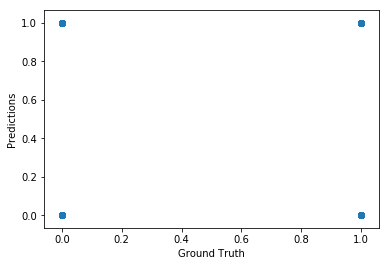

In [218]:
#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.scatter(y_test,predictions)
#plt.scatter(y_test, predictions)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();